In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers
from sklearn.datasets import make_blobs
# from tensorflow.keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers import Input, Dense, Activation,GaussianNoise
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

<font size=5>gene expression dataset</font>

In [377]:
df1 = pd.read_csv('data/df_prot_expression.csv',sep=';')
# df1.head()

In [378]:
df1.shape

(343, 246)

In [379]:
# rename the first column as barcode
df1.rename(columns = {"Unnamed: 0":"barcode"},inplace = True)
# sort the data by barcode column
df1.sort_values(by=['barcode'])
df1.head()

,barcode,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,4E-BP1-R-V,4E-BP1_pS65-R-V,4E-BP1_pT37_T46-R-V,4E-BP1_pT70-R-V,53BP1-R-E,A-Raf-R-V,...,TTF1-R-V,Tuberin-R-E,Tuberin_pT1462-R-V,VEGFR2-R-V,XBP1-G-C,XRCC1-R-E,YAP-R-E,YAP_pS127-R-E,YB-1-R-V,YB-1_pS102-R-V
0,TCGA-2F-A9KO-01A-21-A459-20,0.144162,0.107437,0.112465,0.183165,-0.142706,-0.332475,-0.326587,0.076157,-0.050096,...,-0.062874,-0.359012,0.136182,-0.074833,0.345309,-0.205575,-0.052188,-0.139112,0.111844,-0.065123
1,TCGA-4Z-AA80-01A-21-A458-20,-0.024056,0.004190,-0.259224,-0.103331,0.181644,0.428464,0.205349,0.738733,0.028356,...,0.037279,-0.243887,-0.161180,-0.287152,0.228855,0.166622,-0.181755,-0.090321,-0.333415,0.133465
2,TCGA-FD-A62S-01A-21-A458-20,0.100829,-0.010353,-0.088051,-0.214411,0.119424,-0.013928,0.330129,0.134120,-0.168292,...,0.044071,0.006217,-0.045213,-0.443473,-0.168534,-0.148537,0.078224,0.227924,0.211271,0.355999
3,TCGA-BT-A2LB-01A-21-A209-20,-0.170110,-0.223707,-0.184620,-0.370577,-0.149665,0.027738,0.048750,0.611968,0.019819,...,NaN,0.433135,0.231710,0.271627,-0.288473,0.266724,0.072234,-0.010204,0.092474,0.173585
4,TCGA-FD-A3SN-01A-21-A23Y-20,-0.000668,-0.129307,-0.209477,-0.095544,0.130431,-0.372992,0.126553,-0.418466,0.016428,...,NaN,0.279951,0.259410,0.702777,-0.174990,-0.215259,0.266938,0.958559,-0.029044,-0.087427


<font size=5>Patient dataset</font>

In [380]:
df2 = pd.read_csv('data/Methylation/patient_methy.csv',sep=';')
df2.sort_values(by=['barcode'])
df2.head()

,Unnamed: 0,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,sample_type_id,tumor_descriptor,sample_id,...,paper_focal.deletion.in.PTPRD,paper_focal.deletion.in.KDM6A,paper_Neoantigen.load,paper_HLA.mutation,paper_Fusion.in.FGFR3,paper_Fusion.in.PPARG,paper_Fusion.in.PTPN13,paper_Fusion.in.RHOA,paper_Fusion.in.TNFRSF21,paper_Fusion.in.ASIP
0,1,TCGA-DK-AA6S-01A-21D-A392-05,TCGA-DK-AA6S,TCGA-DK-AA6S-01A,TP,Primary solid Tumor,TCGA-DK-AA6S-01A,1,Not Reported,61cf45dc-21ec-40a3-a72b-3edd21895f6b,...,Loss,Del,1543.0,NaN,no,no,no,no,yes,no
1,2,TCGA-DK-A3IK-01A-32D-A21B-05,TCGA-DK-A3IK,TCGA-DK-A3IK-01A,TP,Primary solid Tumor,TCGA-DK-A3IK-01A,1,Not Reported,4ff20c48-29ee-4101-b409-c4573e38cf92,...,Loss,.,642.0,NaN,no,no,no,no,no,no
2,3,TCGA-CF-A9FM-01A-11D-A38H-05,TCGA-CF-A9FM,TCGA-CF-A9FM-01A,TP,Primary solid Tumor,TCGA-CF-A9FM-01A,1,Not Reported,282dcd5c-c35c-4b72-a3ab-571867e304d0,...,.,.,69.0,NaN,no,no,no,no,no,no
3,4,TCGA-H4-A2HQ-01A-11D-A17Y-05,TCGA-H4-A2HQ,TCGA-H4-A2HQ-01A,TP,Primary solid Tumor,TCGA-H4-A2HQ-01A,1,Not Reported,cbedc0db-39fd-4661-9531-cc24d422fac4,...,Del,.,1403.0,NaN,no,no,no,no,no,no
4,5,TCGA-FD-A3B8-01A-31D-A211-05,TCGA-FD-A3B8,TCGA-FD-A3B8-01A,TP,Primary solid Tumor,TCGA-FD-A3B8-01A,1,Not Reported,9a27aa84-d541-4fa3-a798-d7559a5ae70c,...,.,.,148.0,NaN,no,no,no,yes,no,no


In [381]:
df2.shape

(440, 238)

In [382]:
Y = []
for index,row in df1.iterrows():
    if row['barcode'][0:16] in df2['sample'].values:
        Y.append(df2.iloc[index]['primary_diagnosis'])
print(len(Y))

343


In [383]:
# transform the labels
Y = pd.DataFrame(data=Y, columns=['primary_diagnosis'])
Y

,primary_diagnosis
0,Transitional cell carcinoma
1,Transitional cell carcinoma
2,Papillary transitional cell carcinoma
3,Transitional cell carcinoma
4,Transitional cell carcinoma
...,...
338,Transitional cell carcinoma
339,Transitional cell carcinoma
340,Transitional cell carcinoma
341,Transitional cell carcinoma


distribution of data is
 Transitional cell carcinoma              290
Papillary transitional cell carcinoma     50
Squamous cell carcinoma, NOS               1
Carcinoma, NOS                             1
Papillary adenocarcinoma, NOS              1
Name: primary_diagnosis, dtype: int64


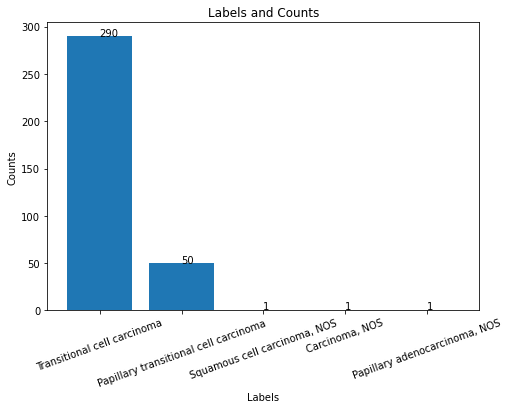

In [384]:
# check number of cancer type
print('distribution of data is' +'\n', Y["primary_diagnosis"].value_counts())
# ploting
counts = Y['primary_diagnosis'].value_counts().rename_axis('Cancer_type').reset_index(name='count')
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(counts['Cancer_type'],counts['count'])
addlabels(counts['Cancer_type'],counts['count'])
plt.title("Labels and Counts")
# giving X and Y labels
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.xticks(rotation=20)
plt.show()

In [374]:
# Solution2: delete the labels with only one sample
# for index,row in Y.iterrows():
#     if row['primary_diagnosis']== 'Squamous cell carcinoma, NOS' or row['primary_diagnosis']== 'Papillary adenocarcinoma, NOS' or row['primary_diagnosis']== 'Carcinoma, NOS':
#         Y = Y.drop(index)
#         df1 = df1.drop(index)

In [375]:
# Solution 3: merge the labels that only have one sample
for index,row in Y.iterrows():
    if row['primary_diagnosis']== 'Squamous cell carcinoma, NOS' or row['primary_diagnosis']== 'Papillary adenocarcinoma, NOS' or row['primary_diagnosis']== 'Carcinoma, NOS':
        row['primary_diagnosis'] = 'NOS'

In [385]:
ord_enc = OrdinalEncoder()
Y['classes'] = ord_enc.fit_transform(Y)
Y

,primary_diagnosis,classes
0,Transitional cell carcinoma,4.0
1,Transitional cell carcinoma,4.0
2,Papillary transitional cell carcinoma,2.0
3,Transitional cell carcinoma,4.0
4,Transitional cell carcinoma,4.0
...,...,...
338,Transitional cell carcinoma,4.0
339,Transitional cell carcinoma,4.0
340,Transitional cell carcinoma,4.0
341,Transitional cell carcinoma,4.0


In [386]:
classes=Y["classes"]
labels = np_utils.to_categorical(classes)
print(labels[:10])

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


In [387]:
X= df1.drop(columns='barcode')
X

,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,4E-BP1-R-V,4E-BP1_pS65-R-V,4E-BP1_pT37_T46-R-V,4E-BP1_pT70-R-V,53BP1-R-E,A-Raf-R-V,A-Raf_pS299-R-C,...,TTF1-R-V,Tuberin-R-E,Tuberin_pT1462-R-V,VEGFR2-R-V,XBP1-G-C,XRCC1-R-E,YAP-R-E,YAP_pS127-R-E,YB-1-R-V,YB-1_pS102-R-V
0,0.144162,0.107437,0.112465,0.183165,-0.142706,-0.332475,-0.326587,0.076157,-0.050096,-0.062312,...,-0.062874,-0.359012,0.136182,-0.074833,0.345309,-0.205575,-0.052188,-0.139112,0.111844,-0.065123
1,-0.024056,0.004190,-0.259224,-0.103331,0.181644,0.428464,0.205349,0.738733,0.028356,0.164522,...,0.037279,-0.243887,-0.161180,-0.287152,0.228855,0.166622,-0.181755,-0.090321,-0.333415,0.133465
2,0.100829,-0.010353,-0.088051,-0.214411,0.119424,-0.013928,0.330129,0.134120,-0.168292,-0.702472,...,0.044071,0.006217,-0.045213,-0.443473,-0.168534,-0.148537,0.078224,0.227924,0.211271,0.355999
3,-0.170110,-0.223707,-0.184620,-0.370577,-0.149665,0.027738,0.048750,0.611968,0.019819,-0.212264,...,NaN,0.433135,0.231710,0.271627,-0.288473,0.266724,0.072234,-0.010204,0.092474,0.173585
4,-0.000668,-0.129307,-0.209477,-0.095544,0.130431,-0.372992,0.126553,-0.418466,0.016428,0.223871,...,NaN,0.279951,0.259410,0.702777,-0.174990,-0.215259,0.266938,0.958559,-0.029044,-0.087427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,-0.192441,0.110508,0.501908,-0.149227,-0.063534,0.033337,-0.091016,0.061523,-0.188608,0.605479,...,-0.100607,-0.165559,-0.159120,1.007196,-0.270984,-0.151747,0.234185,0.142374,0.291133,0.130167
339,-0.042072,-0.051757,-0.490342,0.759652,0.234821,0.683304,0.652416,1.386622,-0.665886,-0.275715,...,NaN,1.323935,0.245053,-0.982771,-0.235579,0.126004,-0.827770,-1.796330,-0.194017,0.363872
340,-0.063873,0.085282,0.147619,-0.266214,-0.024871,-1.273471,-0.006474,0.161941,-0.054522,-0.107956,...,NaN,-0.424135,-0.007319,-0.577572,0.337141,-0.260939,-0.220383,-0.332495,-0.190888,-0.284298
341,-0.033582,-0.037570,-0.188596,-0.148434,-0.023834,0.295517,-0.305320,0.492168,-0.052921,0.122180,...,-0.225113,0.540484,0.014190,0.204568,-0.250642,-0.293108,-0.122278,0.002465,-0.343080,-0.211531


In [389]:
X1 = X[[c for c in list(X)
       if len(X[c].unique())>1]]
len(X1.columns)

245

In [390]:
X1.isna().sum().sum()

8753

In [391]:
# drop the coloumns which contains too many NAN
X2 = X1.dropna(thresh= 10, axis=1)
X2 = X1.fillna(X1.mean())
X2.isna().sum().sum()

0

In [393]:
X2 = X2[[c for c in list(X2)
       if (X2[c]==0).sum()/len(X2)<=0.10]]
X2.shape

(343, 245)

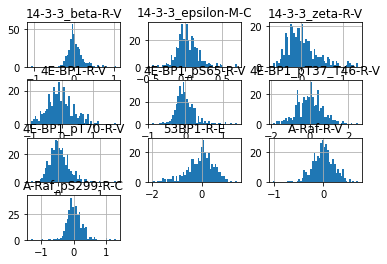

In [394]:
#Plot a histogram for the first 20 features
sub_X2 = X2.iloc[:,:10]
sub_X2.hist(bins=50)
plt.show()

In [395]:
# normalization
scaler =  preprocessing.StandardScaler().fit(X2)
data = scaler.transform(X2)
print(data)

[[ 0.61522586  0.5068739   0.21057804 ... -0.33189714  0.30674344
  -0.48186891]
 [-0.27967261 -0.20786562 -0.78853518 ... -0.2526935  -1.2161088
   0.34024131]
 [ 0.38469712 -0.30854463 -0.32841706 ...  0.26392181  0.64679825
   1.26148067]
 ...
 [-0.49149773  0.35350167  0.30507303 ... -0.64582066 -0.72864693
  -1.38920017]
 [-0.33034868 -0.49695863 -0.59868607 ... -0.10207224 -1.24916391
  -1.08796207]
 [-0.94985341 -0.37665457 -0.4466175  ...  0.5966904  -0.19233165
  -0.54557319]]


In [396]:
# visulaize the data
plt.scatter(X1.iloc[:,2],X1.iloc[:,4],c=classes)

In [397]:
plt.scatter(data[:,2],data[:,4],c=classes)

In [398]:
#Data spliting
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42) 
print(y_train.shape)
print(x_train.shape)
print(x_train.shape[1])


(240, 5)
(240, 245)
245


<font size=5>Building the model</font>

In [402]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Dropout
from keras import regularizers
def creat_model():
    opt = 'SGD'
    # Create & train the Deep MLP model with 2 hidden layers  
    model = Sequential()

    # Add the hidden layers and the regulizers
    nb_features = data.shape[1]
    
    ############## input layer ############
    # simple one
    model.add(Dense(10,input_dim = nb_features,activation='relu'))
    # add noise
    # model.add(GaussianNoise(0.1))
    
    ######## hidden layer 1 ###########
    # simple one
    model.add(Dense(8, activation='relu'))
    # add noise
    # model.add(GaussianNoise(0.1))
    
    ######## hidden layer 2 #############
    # simple one
    model.add(Dense(6, activation='relu'))
    # add noise
    # model.add(GaussianNoise(0.1))
  
    ########## output layer ###########
    # simple one
    model.add(Dense(5, activation='softmax'))
    

    # Compile the model for a multi-class classification problem
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


<font size=4> Grid search </font>

In [349]:
# from scikeras.wrappers import KerasClassifier
# model = KerasClassifier(model=creat_model,batch_size = 20, epochs=50,verbose=0)

In [350]:
# from sklearn.model_selection import GridSearchCV
# # # define the grid search parameters
# batch_size = [20,50,100,150]
# epochs = [50,100,150,200]
# param_grid = dict(batch_size=batch_size, epochs=epochs)
# opt = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# param_grid = dict(optimizer=opt)
# learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
# param_grid = dict(optimizer__learning_rate=learn_rate, optimizer__momentum=momentum)
# init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# param_grid = dict(model__init_mode=init_mode)

# weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint)
# # param_grid = dict(model__dropout_rate=dropout_rate)
# # neurons = [1, 5, 10, 15, 20, 25, 30]
# param_grid = dict(model__neurons=neurons)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(data, labels)

In [351]:
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.853180 using {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.0}
0.853180 (0.057905) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.0}
0.853180 (0.057905) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.2}
0.853180 (0.057905) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.4}
0.835481 (0.053430) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.6}
0.841381 (0.049638) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.8}
0.853180 (0.057905) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.9}
0.853180 (0.057905) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.0}
0.850256 (0.062010) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.2}
0.850230 (0.055485) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.4}
0.847280 (0.053281) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.6}
0.853180 (0.057905)

<font size=4>Running the model</font>

In [403]:
model = creat_model()
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 150, epochs=150, verbose=0)

In [404]:
# Evalute the model
score = model.evaluate(x_test, y_test, batch_size = 150, verbose = 1)
print("Scores on test set: loss=%s accuracy=%s" % tuple(score))


1/1 [==============================] - 0s 15ms/step - loss: 0.7176 - accuracy: 0.8058
Scores on test set: loss=0.7175934910774231 accuracy=0.8058252334594727


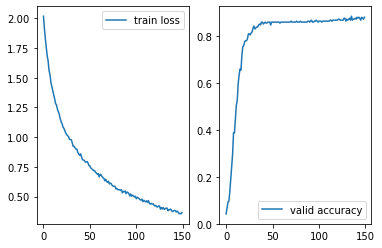

In [405]:
# plot the train loss and the validation loss
plt.figure(1)
plt.subplot(1,2,1)
out = np.asarray(history.history['loss'])
plt.plot(out, label = 'train loss')
plt.legend()

plt.subplot(1,2,2)
out = np.asarray(history.history['accuracy'])
plt.plot(out, label = 'valid accuracy')
plt.legend()

plt.show()

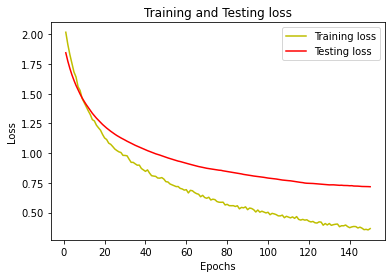

In [406]:
loss= history.history['loss']
val_loss= history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label= 'Testing loss')
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [407]:
print('trainning loss:{} \n testing loss:{}'.format(loss[-1],val_loss[-1]))

trainning loss:0.3652275800704956 
 testing loss:0.7175934910774231


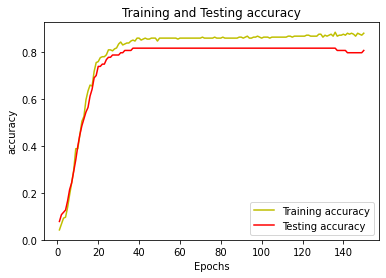

In [408]:
accuracy= history.history['accuracy']
val_accuracy= history.history['val_accuracy']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,'y',label='Training accuracy')
plt.plot(epochs,val_accuracy,'r',label= 'Testing accuracy')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [409]:
print('trainning accuracy:{} \n testing accuracy:{}'.format(accuracy[-1],val_accuracy[-1]))

trainning accuracy:0.8791666626930237 
 testing accuracy:0.8058252334594727
